# Proyecto Individual - Javier Hernández Navarro - C13674

# Mercado de Valores

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Ejemplo introductorio
* Supuesto para simplificar: el precio de la acción cambia por día (como el dolar)

In [2]:
# Suponga que se compra una acción hoy por $100
precio_inicial = [100]

In [3]:
np.random.seed(7)

# Se obtiene una muestra aleatoria de tamaño 10 con distribución N(0,1)
# Esta representa los precios de los próximos 10 días
muestra_aleatoria = np.random.normal(loc=0, scale=1, size=10) + 100

# Se agrega el precio del día que se compró
precios = np.concatenate((precio_inicial, muestra_aleatoria)) 

precios

array([100.        , 101.6905257 ,  99.53406263, 100.03282016,
       100.40751628,  99.21107697, 100.00206557,  99.99910961,
        98.24527569, 101.01765801, 100.60049852])

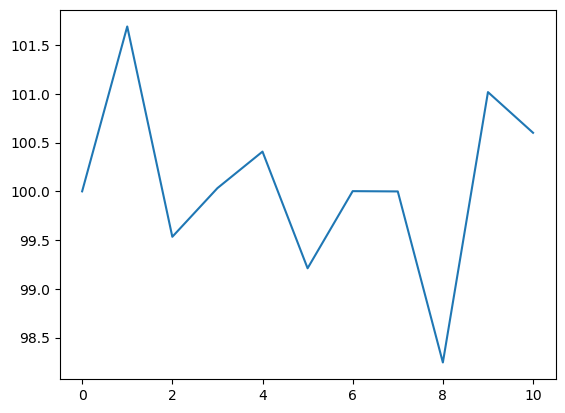

In [4]:
plt.plot(precios) # se observan cambios bruscos

In [5]:
# Suma únicamente los cambios de cada día 
# Esto para ver si hubo ganancias o pérdidas
diferencias = (precios - 100).cumsum()

diferencias # cada entrada es lo que ha cambiado hasta ese día

array([ 0.        ,  1.6905257 ,  1.22458833,  1.2574085 ,  1.66492478,
        0.87600175,  0.87806732,  0.87717694, -0.87754737,  0.14011064,
        0.74060915])

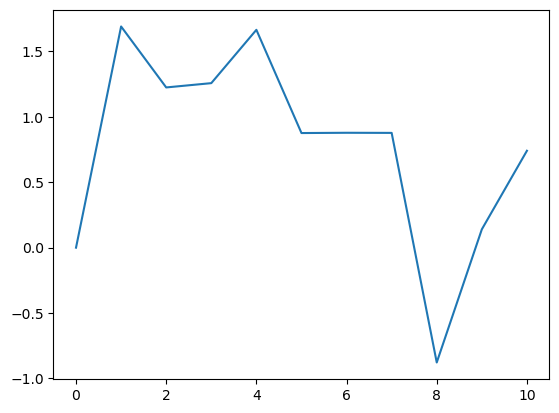

In [6]:
plt.plot(diferencias) # crecimientos son aumentos / decrecimientos son disminuciones 

In [7]:
diferencias.mean() # ¿Cuánto debería dar esto?

0.7701696137358428

In [8]:
diferencias.std() # ¿Por qué dan estos valores?

0.7281242268267085

## Ejemplo real

In [9]:
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt

def obtener_historial(ticker):
    '''
    Función que obtiene el historial (desde el 01-01-2024) de los precios de 
    las acciones de la empresa ingresada.
    
    Parámetros:
        ticker(str): ticker de la empresa.
        
    Devuelve:
        stock_data(pd.DataFrame): el dataframe con el historial de la empresa.
    '''
    
    # Define las fechas
    fecha_inicial = '2014-01-01'
    fecha_actual = dt.date.today()
    fecha_final = fecha_actual.strftime("%Y-%m-%d")
    
    # Descarga los datos por medio de dos intentos
    try:
        stock_data = yf.download(ticker, start=fecha_inicial, end=fecha_final)
    except:
        try:
            stock_data = pdr.get_data_yahoo(ticker, start=fecha_inicial, end=fecha_final)
        except:
            return "No se encontró el historial."
    
    return stock_data

In [10]:
ticker = 'TSLA' # Apple: AAPL, Tesla: TSLA, Microsoft: MSFT, ...

stock = obtener_historial(ticker=ticker)

stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2024-06-07,176.130005,179.350006,175.580002,177.479996,177.479996,56244900
2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50869700
2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900


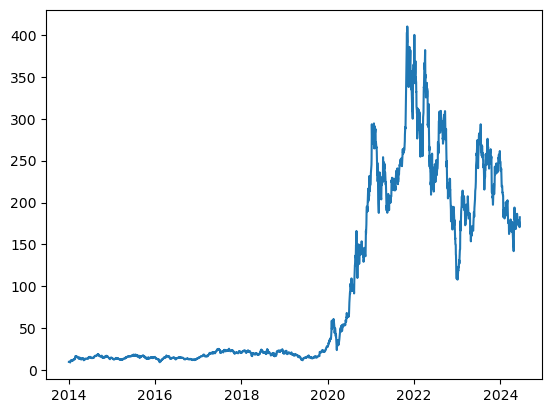

In [11]:
plt.plot(stock['Adj Close'])

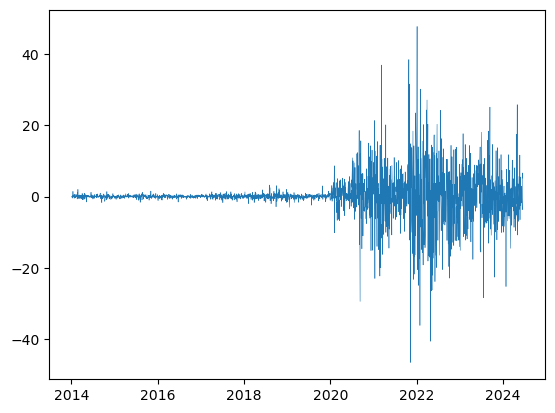

In [12]:
# Nuevamente obtengamos las ganancias o pérdidas
diferencias = stock['Adj Close'] - stock['Adj Close'].shift()

plt.plot(diferencias, linewidth=0.4)

In [13]:
media_muestral = diferencias.mean()

media_muestral # parece que hay una tendencia a ganar

0.06560035529994565

In [14]:
desv_muestral = diferencias.std()

desv_muestral # los cambios suelen ser de +-$1.74

5.449332211857135

In [15]:
np.random.seed(15)

# Realiza tres simulaciones con la media y desviación muestral
mod1 = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))
mod2 = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))
mod3 = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))

In [16]:
# Partiendo del precio inicial, suma los cambios por día
sim1 = stock['Adj Close'].iloc[0] + mod1.cumsum()
sim2 = stock['Adj Close'].iloc[0] + mod2.cumsum()
sim3 = stock['Adj Close'].iloc[0] + mod3.cumsum()

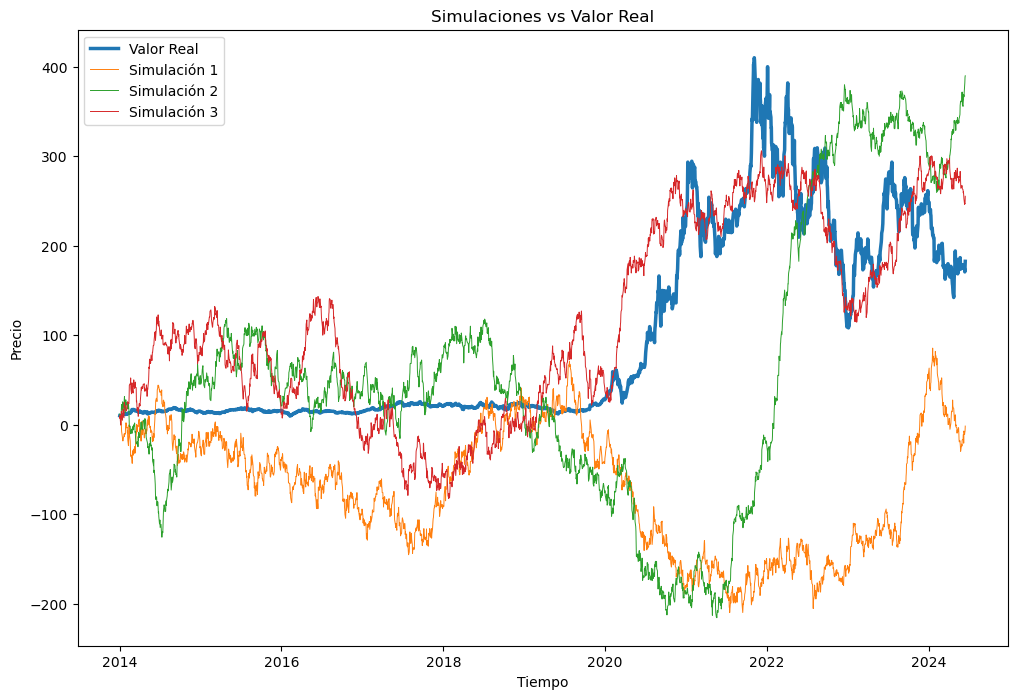

In [17]:
fechas = stock.index

plt.figure(figsize=(12,8))
plt.title('Simulaciones vs Valor Real')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.plot(stock['Adj Close'], label='Valor Real', linewidth=2.5)
plt.plot(fechas, sim1, label='Simulación 1', linewidth=0.7)
plt.plot(fechas, sim2, label='Simulación 2', linewidth=0.7)
plt.plot(fechas, sim3, label='Simulación 3', linewidth=0.7)
plt.legend()
plt.show()

# Simulaciones

In [25]:
import time

## Procesos estructurados

In [26]:
def realizar_simulaciones(n_simulaciones):
    '''
    Función que realiza simulaciones de manera estructurada.
    Obs: las simulaciones son con base a los datos de stock.
    
    Parámetros: 
        n_simulaciones(int): la cantidad de simulaciones que se quiere realizar.
        
    Devuelve:
        simulaciones:(list): lista con todas las simulaciones.
    '''
    
    simulaciones = []
    
    for n in range(n_simulaciones):
        simulacion = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))
        simulaciones.append(simulacion)
        
    return simulaciones

In [27]:
n_simulaciones = 200_000

t = time.time()

resultados_lineales = realizar_simulaciones(n_simulaciones) 

t_final = time.time() - t

print('Tiempo de ejecución: ', t_final)

print('Simulaciones realizadas: ', len(resultados_lineales))

Tiempo de ejecución:  15.002003908157349
Simulaciones realizadas:  200000


In [28]:
#resultados_lineales

## Procesos paralelizados

In [29]:
#import multiprocessing as mp
import multiprocess as mp

In [30]:
# Obtienen la cantidad de núcleos
mp.cpu_count()

8

In [31]:
n_simulaciones = 200_000
nucleos = mp.cpu_count() // 2 # defino la cantidad de núcleos a usar

simulaciones_por_nucleo = n_simulaciones  // nucleos

# Iniciador de proceso paralelizado
if __name__ == '__main__':
    
    t = time.time()
    
    procesos = []
    
    # Crea los procesos y les asigna la función con sus respectivos parámetros
    for n in range(nucleos):
        proceso = mp.Process(target=realizar_simulaciones, args=(simulaciones_por_nucleo,))
        procesos.append(proceso)
        
    # Inicia los procesos de forma paralelizada
    for proceso in procesos:
        proceso.start()

    # Espera a que todos los procesos terminen
    for proceso in procesos:
        proceso.join()
    
    t_final = time.time() - t
    
print('Tiempo de ejecución: ', t_final)

Tiempo de ejecución:  4.895410776138306


In [32]:
procesos # ojo, no se puede acceder a los resultados directamente

[<Process name='Process-1' pid=20833 parent=20779 stopped exitcode=0>,
 <Process name='Process-2' pid=20834 parent=20779 stopped exitcode=0>,
 <Process name='Process-3' pid=20835 parent=20779 stopped exitcode=0>,
 <Process name='Process-4' pid=20836 parent=20779 stopped exitcode=0>]

### Solución (?)

In [33]:
def simulaciones_paralelizadas(n_simulaciones, nucleo):
    '''
    Función que realiza simulaciones con procesos paralelos.
    Obs: no devuelve nada, modifica directamente la lista que recibe.
    
    Parámetros:
        n_simulaciones(int): la cantidad de simulaciones que se quiere realizar.
        nucleo(manager.list): lista paralelizada para guardar los resultados.
    '''
    
    for n in range(n_simulaciones):
        simulacion = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))
        nucleo.append(simulacion)

In [34]:
n_simulaciones = 200_000
nucleos = mp.cpu_count() // 2 # defino la cantidad de núcleos a usar

simulaciones_por_nucleo = n_simulaciones  // nucleos

# Iniciador de proceso paralelizado
if __name__ == '__main__':
    
    # Crea un objeto manager para poder acceder a los resultados
    manager = mp.Manager()
    
    # Debe crearse uno por nucleo
    nucleo1 = manager.list()
    nucleo2 = manager.list()
    nucleo3 = manager.list()
    nucleo4 = manager.list()

    t = time.time()

    # Crea los procesos y les asigna la función con sus respectivos parámetros
    proceso1 = mp.Process(target=simulaciones_paralelizadas, args=(simulaciones_por_nucleo, nucleo1))
    proceso2 = mp.Process(target=simulaciones_paralelizadas, args=(simulaciones_por_nucleo, nucleo2))
    proceso3 = mp.Process(target=simulaciones_paralelizadas, args=(simulaciones_por_nucleo, nucleo3))
    proceso4 = mp.Process(target=simulaciones_paralelizadas, args=(simulaciones_por_nucleo, nucleo4))

    # Inicia los procesos de forma paralelizada
    proceso1.start()
    proceso2.start()
    proceso3.start()
    proceso4.start()

    # Espera a que todos los procesos terminen
    proceso1.join()
    proceso2.join()
    proceso3.join()
    proceso4.join()
    
    t_final = time.time() - t

print('Tiempo de ejecución: ', t_final)

print('Simulaciones en nucleo 1:', len(nucleo1))
print('Simulaciones en nucleo 2:', len(nucleo2))
print('Simulaciones en nucleo 3:', len(nucleo3))
print('Simulaciones en nucleo 4:', len(nucleo4))

Tiempo de ejecución:  25.263927936553955
Simulaciones en nucleo 1: 50000
Simulaciones en nucleo 2: 50000
Simulaciones en nucleo 3: 50000
Simulaciones en nucleo 4: 50000


In [35]:
nucleo1 # sigo sin poder acceder directamente a las simulaciones

<ListProxy object, typeid 'list' at 0x13317fd10>

In [37]:
# Lo que pasa acá es que tengo 4 listas. ¿Y si quiero solo una?

resultados_paralelizados = []

t = time.time()

resultados_paralelizadas.extend(nucleo1)
resultados_paralelizadas.extend(nucleo2)
resultados_paralelizadas.extend(nucleo3)
resultados_paralelizadas.extend(nucleo4)

t_final = time.time() - t

print('Tiempo de ejecución: ', t_final)
print('Simulaciones realizadas:', len(resultados_paralelizadas))

Tiempo de ejecución:  53.977216958999634
Simulaciones realizadas: 200000


In [38]:
#resultados_paralelizados

### Alternativa: Threading

In [39]:
import threading

In [41]:
def simulaciones_hilos(n_simulaciones):
    '''
    Función que realiza simulaciones con procesos concurrentes.
    Obs: guarda las simulaciones de forma global.
    
    Parámetros:
        n_simulaciones(int): la cantidad de simulaciones que se quiere realizar.
    '''
    
    global resultados_hilos
    
    for n in range(n_simulaciones):
        simulacion = np.random.normal(media_muestral, desv_muestral, len(stock['Adj Close']))
        resultados_hilos.append(simulacion)

In [42]:
resultados_hilos = []

n_simulaciones = 200_000
n_hilos = 10 # ojo, puedo crear más hilos dado que no son núcleos

simulaciones_por_hilo = n_simulaciones // n_hilos

t = time.time()

hilos = []

# Crea los hilos y les asigna la función con sus respectivos parámetros
# Inicia inmediatamente cada hilo después de crearlo
for n in range(n_hilos):
    hilo = threading.Thread(target=simulaciones_hilos, args=(simulaciones_por_hilo,))
    hilos.append(hilo)
    hilo.start()
        
# Espera a que terminen todos los hilos
for hilo in hilos:
    hilo.join()

t_final = time.time() - t

print('Tiempo de ejecución: ', t_final)

print('Simulaciones realizadas:', len(resultados_hilos))

Tiempo de ejecución:  20.061949253082275
Simulaciones realizadas: 200000


In [43]:
#resultados_hilos